In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.datasets import boston_housing
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [8]:
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()


In [9]:
X = np.vstack((X_train, X_test))
y = np.hstack((y_train, y_test))

In [10]:
feature_names = [
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM',
    'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'
]

In [11]:
df = pd.DataFrame(X, columns=feature_names)
df['Price'] = y


In [12]:
print(df.head())


      CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD    TAX  \
0  1.23247   0.0   8.14   0.0  0.538  6.142   91.7  3.9769   4.0  307.0   
1  0.02177  82.5   2.03   0.0  0.415  7.610   15.7  6.2700   2.0  348.0   
2  4.89822   0.0  18.10   0.0  0.631  4.970  100.0  1.3325  24.0  666.0   
3  0.03961   0.0   5.19   0.0  0.515  6.037   34.5  5.9853   5.0  224.0   
4  3.69311   0.0  18.10   0.0  0.713  6.376   88.4  2.5671  24.0  666.0   

   PTRATIO       B  LSTAT  Price  
0     21.0  396.90  18.72   15.2  
1     14.7  395.38   3.11   42.3  
2     20.2  375.52   3.26   50.0  
3     20.2  396.90   8.01   21.1  
4     20.2  391.43  14.65   17.7  


In [13]:

# Features and target variable
X = df.drop('Price', axis=1).values
y = df['Price'].values



In [14]:

# Standardize the data (important for neural networks)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [15]:
# Build the Deep Neural Network model for Linear Regression
model = models.Sequential([
    layers.Dense(64, activation='relu', input_dim=X_train.shape[1]),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Output layer with 1 neuron for regression output (no activation function)
])



C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')



In [17]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=1)



Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - loss: 589.6168 - val_loss: 576.9898
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 525.1311 - val_loss: 512.2108
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 492.6273 - val_loss: 396.3017
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 321.6371 - val_loss: 215.5590
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 168.8057 - val_loss: 79.3362
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 76.3401 - val_loss: 57.0580
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 40.9487 - val_loss: 38.9128
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 31.0685 - val_loss: 30.1272
Epoch 9/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 22.2267 - val_loss: 25.6884
Epoch 10/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 22.4421 - val_loss: 23.3591


In [18]:
# Evaluate the model on the test data
test_loss = model.evaluate(X_test, y_test)
print(f"Test Loss (Mean Squared Error): {test_loss}")



4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 20.8635
Test Loss (Mean Squared Error): 23.359086990356445


In [19]:
# Make predictions
predictions = model.predict(X_test)



4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


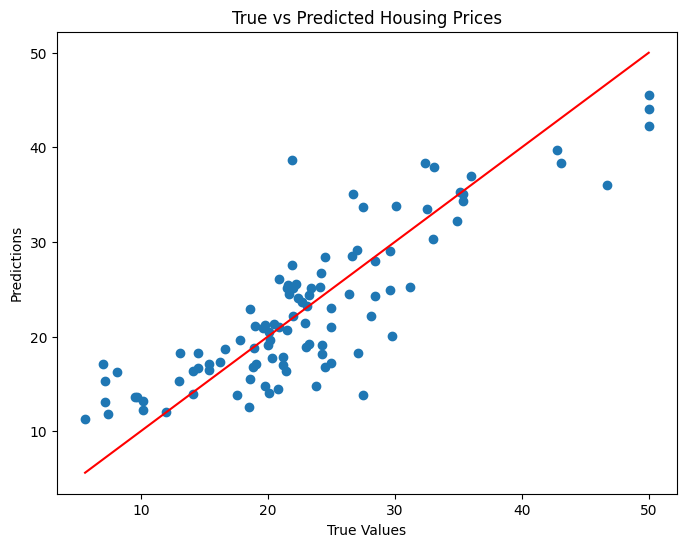

In [20]:
# Compare the predictions to the actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # 45-degree line
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted Housing Prices')
plt.show()



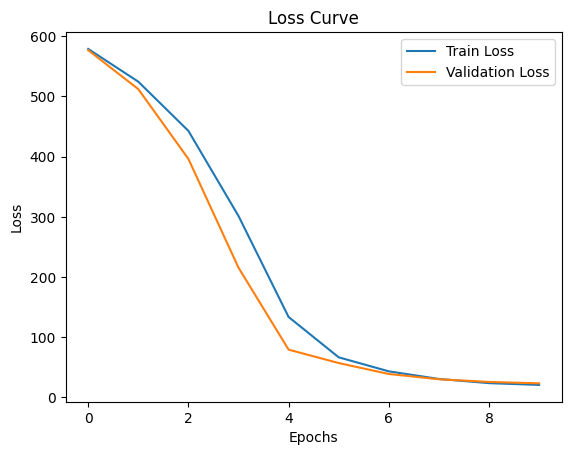

In [21]:
# Optionally, plot the loss curve
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()




Correlation matrix:
             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B      

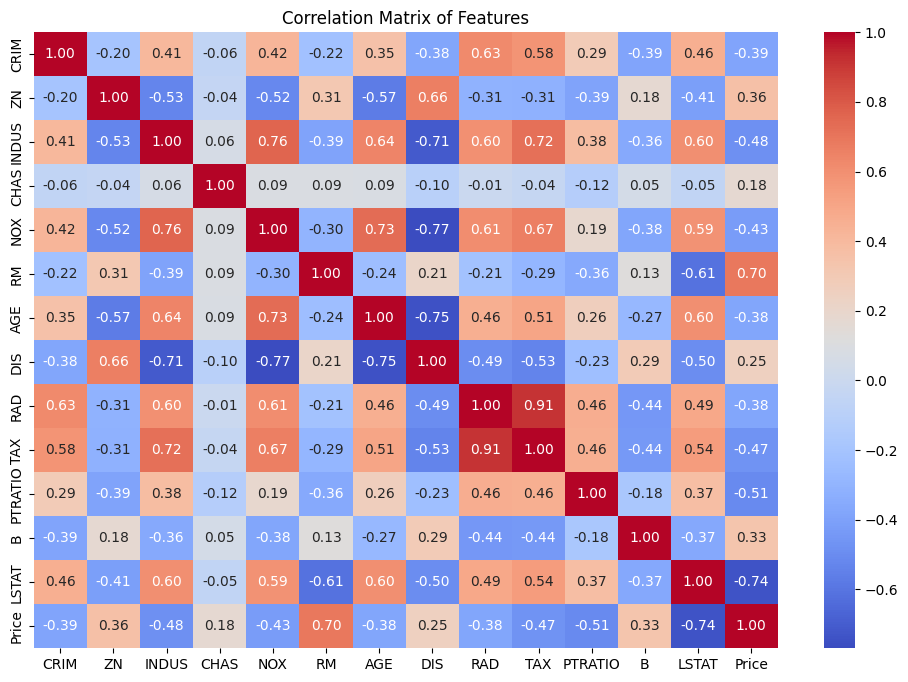

In [23]:
import seaborn as sns
print("\nCorrelation matrix:")
correlation_matrix = df.corr()
print(correlation_matrix)

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Features')
plt.show()



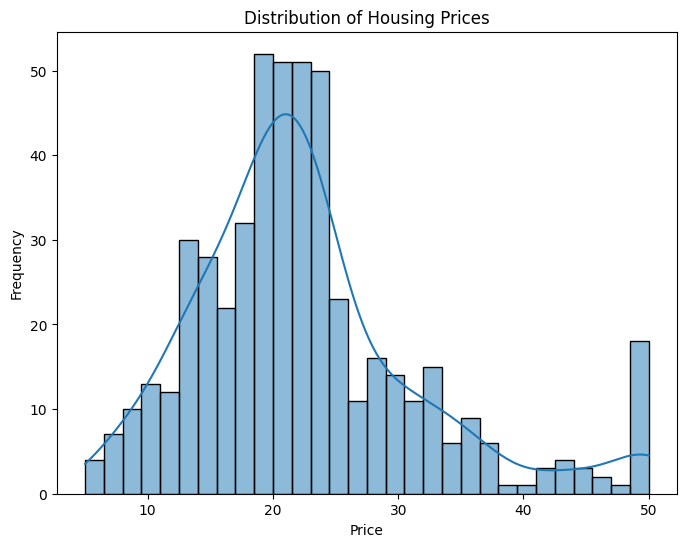

In [24]:
# Visualizing the distribution of the target variable (Price)
plt.figure(figsize=(8, 6))
sns.histplot(df['Price'], kde=True, bins=30)
plt.title('Distribution of Housing Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()



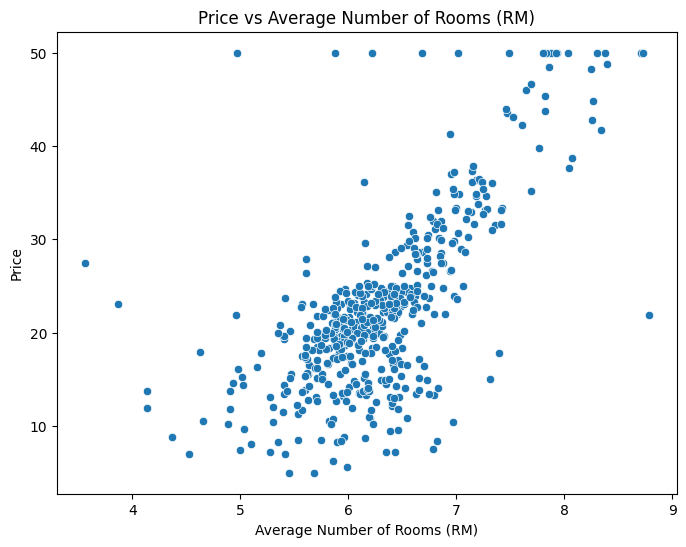

In [25]:
# Visualizing the relationship between the most correlated feature and Price
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['RM'], y=df['Price'])
plt.title('Price vs Average Number of Rooms (RM)')
plt.xlabel('Average Number of Rooms (RM)')
plt.ylabel('Price')
plt.show()